# *Insight for Cab Investment firm*

### Business problem:
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to  understand the market before taking final decision.

### Properties of the data provided (data intake report):
After merging 4 csv files, the final dataset contains 3,59,392 rows and 22 columns containing information of 2 cab services from 19 cities.

### Steps taken in order to create an applicable data set:
1. Merged Cab and City data on 'City' column.
2. Merged Customer and Transaction data on 'Transaction_ID'.
3. Finally merged the above two data on 'Transaction_ID'.

### Steps taken perform analysis:
1. Convert 'Date of Travel' column into pandas datetime column and set it as the index
2. Created new columns to better analyze the trend.
3. EDA
4. Hypothesis Testing

### Type of analysis performed:
1. Univariate Analysis
2. Bivariate Analysis
3. Time series Analysis

### Assumptions made:
1. Outliers are present in "Price Charged" feature but due to unavailability of trip duration details, we are not treating this as outlier.
2. Profit of rides are calculated keeping other factors constant and only "Price Charged" and "Cost of Trip" features used to calculate profit.
3. Users feature of city dataset is treated as number of cab users in the city.

# Data Collection

### Import Libraries & set default style

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Read csv files

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

### Merge into one dataframe

In [3]:
df_1 = pd.merge(cab, city, on="City")
df_2 = pd.merge(customer, transaction, on="Customer ID")
df = pd.merge(df_1, df_2, on="Transaction ID")

### Create new columns

In [4]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Day'] = df['Date of Travel'].dt.day
df['Weekday'] = df['Date of Travel'].dt.weekday
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Profit Percentage per Trip'] = ((df['Profit'] / df['Cost of Trip'])*100).round(2)
df['Profit per KM'] = ((df['Profit'] / df['KM Travelled']))
                       
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Users'] = df['Users'].str.replace(',', '').astype(float)
df['Users Density'] = df['Users'] / df['Population']

In [5]:
df.sort_values(by='Date of Travel', inplace=True)
df.set_index('Date of Travel', inplace=True)

# Data Exploration

In [6]:
pd.set_option("display.max_columns", 25)
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Users Density
Date of Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,1595037.0,144132.0,7219,Male,18,13980,Cash,2,5,1,2016,75.0848,22.91,2.941042,0.090363
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,418859.0,127001.0,53869,Female,34,6570,Card,2,5,1,2016,107.3844,18.29,2.436125,0.303207
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,248968.0,80021.0,59321,Male,45,22849,Cash,2,5,1,2016,-47.3550,-11.68,-1.226496,0.321411
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,959307.0,69995.0,19497,Male,30,11978,Card,2,5,1,2016,-1.0400,-2.00,-0.220339,0.072964
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,418859.0,127001.0,53389,Male,26,2702,Cash,2,5,1,2016,213.0400,38.59,4.631304,0.303207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,10435303,Yellow Cab,NEW YORK NY,39.20,1000.88,508.0320,8405837.0,302149.0,46,Female,37,19348,Card,31,0,12,2018,492.8480,97.01,12.572653,0.035945
2018-12-31,10435591,Yellow Cab,NEW YORK NY,37.74,918.58,511.7544,8405837.0,302149.0,1049,Female,40,23646,Card,31,0,12,2018,406.8256,79.50,10.779693,0.035945
2018-12-31,10434932,Yellow Cab,LOS ANGELES CA,22.88,396.35,315.7440,1595037.0,144132.0,6646,Female,31,7722,Cash,31,0,12,2018,80.6060,25.53,3.522990,0.090363


In [7]:
df.shape

(359392, 21)

Final dataset contains 3,59,392 rows & 21 columns

In [86]:
df.drop(['Transaction ID', 'Customer ID'], axis=1, inplace=True)

### Get some statistical values of each Numerical colums

In [87]:
df.describe()

,KM Travelled,Price Charged,Cost of Trip,Population,Users,Age,Income (USD/Month),Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Users Density,Total Price Charged,Total Cost of Trip,Price Charged per KM
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,3.593920e+05,359392.000000
mean,22.567254,423.443311,286.190113,3.132198e+06,158365.582267,35.336705,15048.822937,15.972835,3.463461,7.156047,2017.045199,137.253198,47.523121,6.083579,0.106687,7.742328e+07,5.146870e+07,18.765127
std,12.233526,274.378911,157.993661,3.315194e+06,100850.051020,12.594234,7969.409482,8.503010,1.940577,3.413283,0.800239,160.311840,42.571507,5.543493,0.106331,4.405099e+07,2.968841e+07,5.878560
min,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,18.000000,2000.000000,1.000000,0.000000,1.000000,2016.000000,-220.060000,-40.930000,-4.998235,0.006497,4.028900e+02,3.278052e+02,6.338621
25%,12.000000,206.437500,151.200000,6.712380e+05,80021.000000,25.000000,8424.000000,9.000000,2.000000,4.000000,2016.000000,28.012000,16.080000,2.000385,0.035945,3.889724e+07,2.574346e+07,14.451327
50%,22.440000,386.360000,282.480000,1.595037e+06,144132.000000,33.000000,14685.000000,16.000000,4.000000,8.000000,2017.000000,81.962000,35.930000,4.466809,0.072964,7.826163e+07,5.148147e+07,17.153501
75%,32.960000,583.660000,413.683200,8.405837e+06,302149.000000,42.000000,21035.000000,23.000000,5.000000,10.000000,2018.000000,190.030000,71.270000,9.170006,0.090363,1.159476e+08,7.719910e+07,22.234926
max,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,65.000000,35000.000000,31.000000,6.000000,12.000000,2018.000000,1463.966000,320.210000,41.115556,0.321411,1.521821e+08,1.028544e+08,53.955556


#### Since there is no null value and also we can see that the minimum and maximum km travelled, price and cost are all valid values so no need to drop any rows from the dataset

### Get type, null-value count

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359392 entries, 2016-01-02 to 2018-12-31
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Transaction ID              359392 non-null  int64  
 1   Company                     359392 non-null  object 
 2   City                        359392 non-null  object 
 3   KM Travelled                359392 non-null  float64
 4   Price Charged               359392 non-null  float64
 5   Cost of Trip                359392 non-null  float64
 6   Population                  359392 non-null  float64
 7   Users                       359392 non-null  float64
 8   Customer ID                 359392 non-null  int64  
 9   Gender                      359392 non-null  object 
 10  Age                         359392 non-null  int64  
 11  Income (USD/Month)          359392 non-null  int64  
 12  Payment_Mode                359392 non-null  object 
 13

#### There are no missing values

### Check Duplicate Rows if any

In [10]:
duplicate = df[df.duplicated()]
duplicate

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Users Density
Date of Travel,,,,,,,,,,,,,,,,,,,,,


#### There are no duplicate rows!

### Find unique values of each column

In [11]:
df.nunique()

Transaction ID                359392
Company                            2
City                              19
KM Travelled                     874
Price Charged                  99176
Cost of Trip                   16291
Population                        19
Users                             19
Customer ID                    46148
Gender                             2
Age                               48
Income (USD/Month)             22725
Payment_Mode                       2
Day                               31
Weekday                            7
Month                             12
Year                               3
Profit                        303907
Profit Percentage per Trip     21939
Profit per KM                 356133
Users Density                     19
dtype: int64

#### There are 2 cab service provider in 19 different cities

### City with highest no. of running cabs

In [12]:
df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

#### New York City count in the dataset is the highest which may imply more no. of cabs are running in this city. This may be due to high population also.

### Demand of the 2 cab service providers in each city

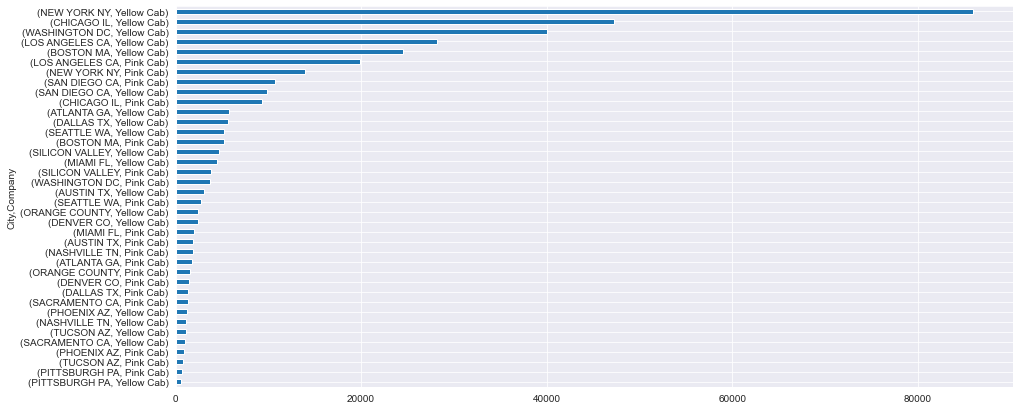

In [13]:
plt.figure(figsize=(15, 7))
df.groupby('City').Company.value_counts().sort_values(ascending=True).plot(kind='barh');

#### Yellow Cabs are dominating in most of the cities

In [14]:
city_grp = df.groupby('City')
city_grp['Company'].value_counts().unstack()

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


#### People prefer Yellow Cabs over Pink Cabs in every city except these 4:
#### 1. Nashville
#### 2. Pittsburgh
#### 3. Sacramento
#### 4. San Diego

### Visual Comparison:

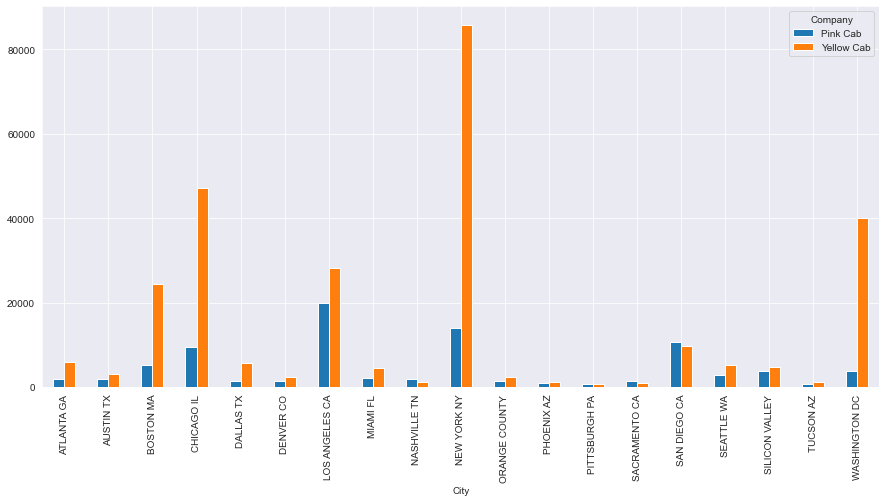

In [15]:
city_grp['Company'].value_counts().unstack().plot(kind='bar', figsize=(15, 7));

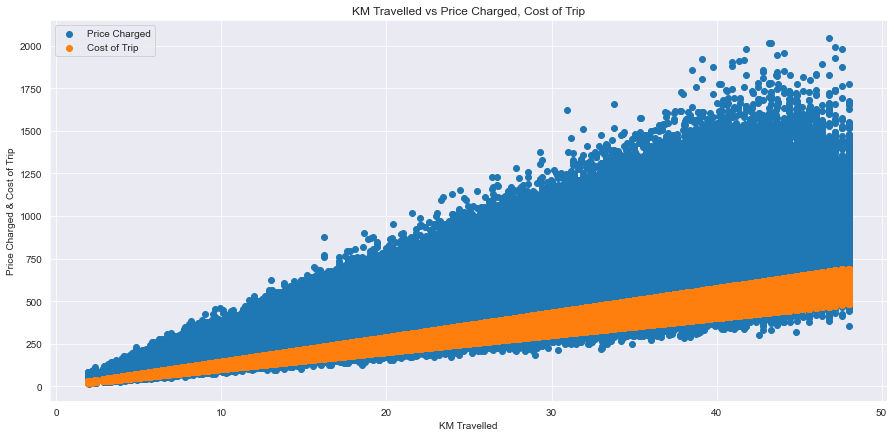

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(x = df['KM Travelled'], y = df['Price Charged']);
ax.scatter(x = df['KM Travelled'], y = df['Cost of Trip']);
plt.xlabel("KM Travelled")
plt.ylabel("Price Charged & Cost of Trip")
plt.title("KM Travelled vs Price Charged, Cost of Trip")
ax.legend(['Price Charged', 'Cost of Trip'])
plt.show()

#### As the distance increases, both cost and price increases linearly but the difference becomes more pronounced

### Profit per KM City wise

In [17]:
df.groupby('City')['Profit per KM'].median()

City
ATLANTA GA         4.591498
AUSTIN TX          4.296468
BOSTON MA          2.448953
CHICAGO IL         2.329217
DALLAS TX          6.936991
DENVER CO          4.262593
LOS ANGELES CA     3.570160
MIAMI FL           4.599710
NASHVILLE TN       1.769476
NEW YORK NY       12.268408
ORANGE COUNTY      4.051526
PHOENIX AZ         3.815931
PITTSBURGH PA      1.863913
SACRAMENTO CA      1.696495
SAN DIEGO CA       3.131335
SEATTLE WA         3.052507
SILICON VALLEY     6.169811
TUCSON AZ          2.770540
WASHINGTON DC      3.171498
Name: Profit per KM, dtype: float64

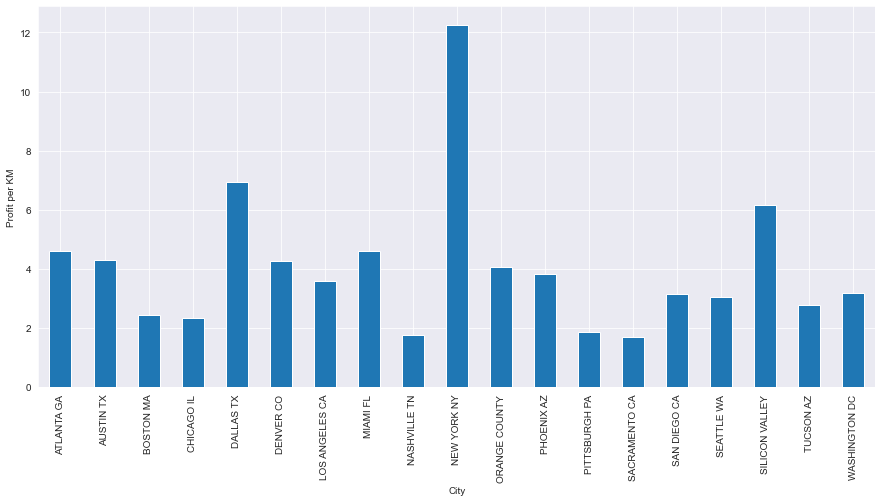

In [18]:
df.groupby('City')['Profit per KM'].median().plot(kind='bar', figsize=(15,7), ylabel='Profit per KM');

#### New York City has the highest Profit per KM while Sacramenyo has the lowest Profit per KM 

### Overall profit analysis over 3 years

In [19]:
month_year_group = df.groupby(['Month', 'Year'])
(month_year_group[['KM Travelled', 'Profit', 'Profit Percentage per Trip', 'Profit per KM']].median()).unstack()

KM Travelled                   Profit                     \
Year          2016    2017   2018      2016      2017     2018   
Month                                                            
1            22.68  22.310  22.47  101.3955  102.5436  78.1024   
2            22.23  22.800  22.42  105.1704   98.8360  83.3908   
3            22.66  22.310  22.40   99.0996  100.4620  80.1816   
4            22.47  22.200  22.77   94.0260   84.4970  75.0600   
5            22.14  22.000  22.44   97.5768  106.3420  83.5194   
6            22.54  22.680  22.04  101.4520   92.0100  71.1640   
7            22.88  22.420  22.47   75.8940   75.5400  56.7342   
8            22.44  22.420  22.04   66.4040   79.0450  56.9450   
9            22.31  22.610  22.31   86.2068   89.8596  72.2480   
10           22.31  22.455  22.61   84.6760   86.0140  70.9784   
11           22.54  22.540  22.67   85.1220   71.8090  58.1984   
12           22.60  22.610  22.54   91.5096   95.3624  73.1400   

      Profit Percentage per Trip                 Profit per KM            \
Year                        2016    2017    2018          2016      2017   
Month                                                                      
1                         42.165  43.920  32.780      5.284826  5.511927   
2                         44.110  41.760  35.100      5.508758  5.272381   
3                         42.190  43.920  33.610      5.263040  5.499130   
4                         40.620  39.725  31.440      5.038333  4.956146   
5                         41.825  46.110  36.135      5.280400  5.886250   
6                         42.320  39.860  30.220      5.326667  4.997941   
7                         32.635  33.380  24.590      4.035815  4.126473   
8                         29.500  34.605  25.060      3.624775  4.284110   
9                         37.830  38.960  30.840      4.783265  4.864087   
10                        38.220  39.445  30.600      4.787408  4.999211   
11                        37.030  33.280  25.165      4.537607  4.105482   
12                        39.300  43.640  31.170      4.850633  5.413333   

                 
Year       2018  
Month            
1      4.100370  
2      4.408868  
3      4.170833  
4      3.946843  
5      4.573862  
6      3.803590  
7      3.048915  
8      3.075701  
9      3.844514  
10     3.797064  
11     3.079803  
12     3.845714

#### On comparison, we see that there is slight decrement in the profit margin for the year 2018.

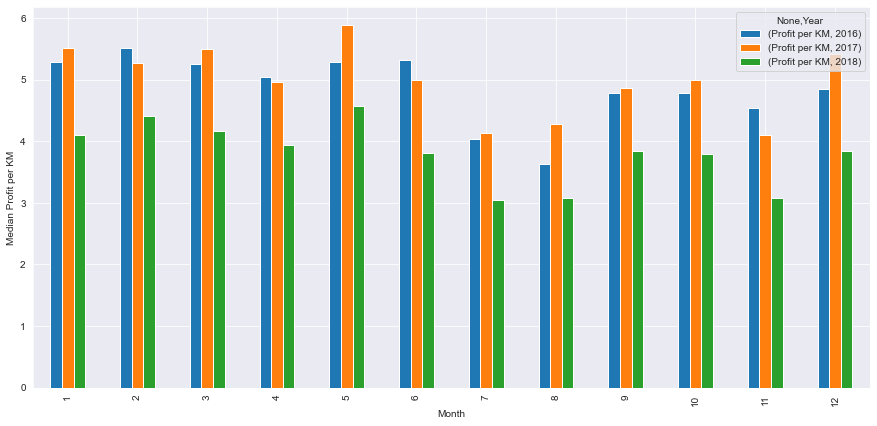

In [20]:
((month_year_group[['Profit per KM']].median()).unstack()).plot(kind='bar', figsize=(15,7), ylabel='Median Profit per KM');

#### There is a dip in profit per KM each year during July and August which implies there is some seasonality.

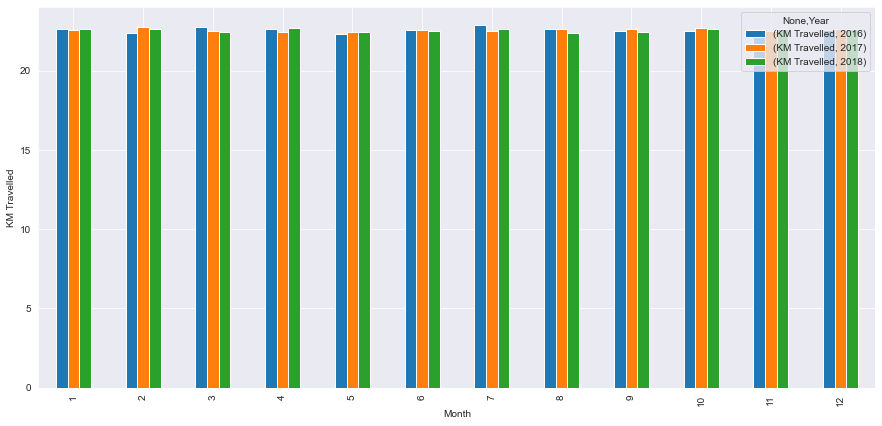

In [21]:
((month_year_group[['KM Travelled']].mean()).unstack()).plot(kind='bar', figsize=(15,7), ylabel='KM Travelled');

#### Avg distance travelled is 22.5 KM. Later we will prove it using null hypothesis.

### Weekly Analysis:

In [22]:
weekday_group = df.groupby(['Weekday'])
(weekday_group[['KM Travelled', 'Profit', 'Profit Percentage per Trip', 'Profit per KM']].median())

,KM Travelled,Profit,Profit Percentage per Trip,Profit per KM
Weekday,,,,
0,22.31,73.5640,32.180,3.996667
1,22.44,75.9660,33.750,4.181606
2,22.42,73.8000,32.670,4.056515
3,22.31,71.8356,32.045,3.970767
4,22.54,86.0720,37.370,4.637247
5,22.54,89.6004,38.360,4.776257
6,22.54,91.4540,39.830,4.973045


#### Over the weekends: distance travelled increases slightly => Profit increases

## Cummulative Profit Vs Cost over the years b/w 2 cab service providers

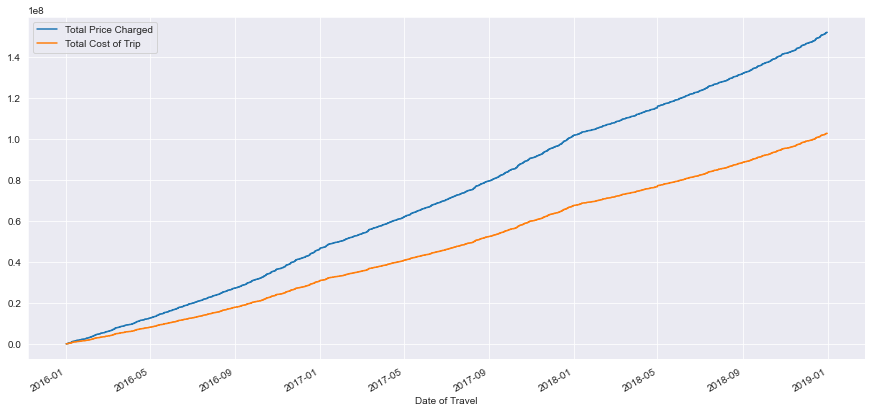

In [23]:
df['Total Price Charged'] = df['Price Charged'].cumsum()
df['Total Cost of Trip'] = df['Cost of Trip'].cumsum()

plt.figure(figsize=(15, 7))
df['Total Price Charged'].plot();
df['Total Cost of Trip'].plot();
plt.legend();

#### Above graph shows the power of compounding effect.
#### To maximize the profit, XYZ should invest for a long term

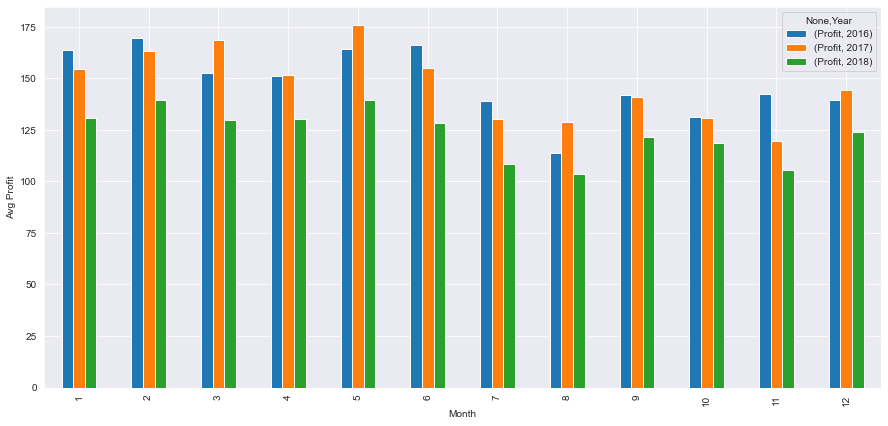

In [24]:
((month_year_group[['Profit']].mean()).unstack()).plot(kind='bar', figsize=(15, 7), ylabel='Avg Profit', xlabel='Month');

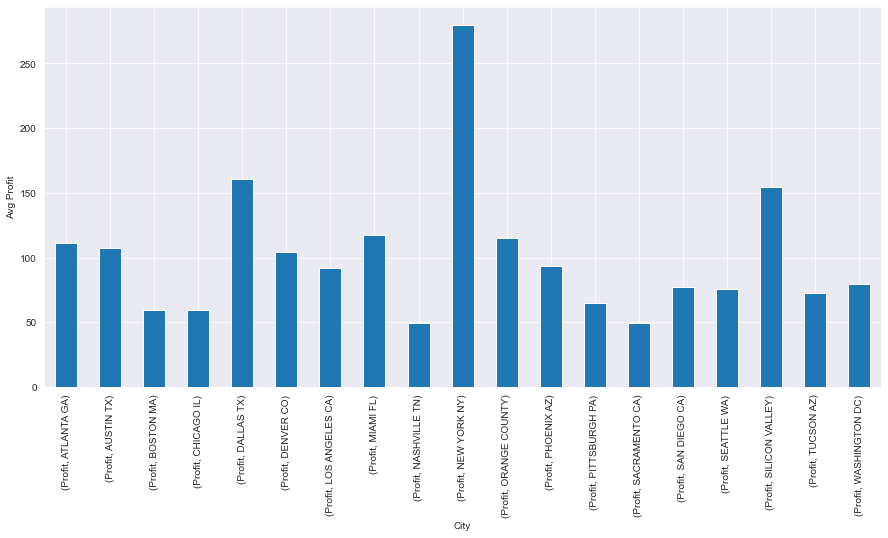

In [25]:
((city_grp[['Profit']].mean()).unstack()).plot(kind='bar', figsize=(15, 7), xlabel='City', ylabel='Avg Profit');

#### Top 5 cities with highest avg profit (in descending order):
1. New York
2. Dallas
3. Silicon Valley
4. Miami
5. Orange County

In [26]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

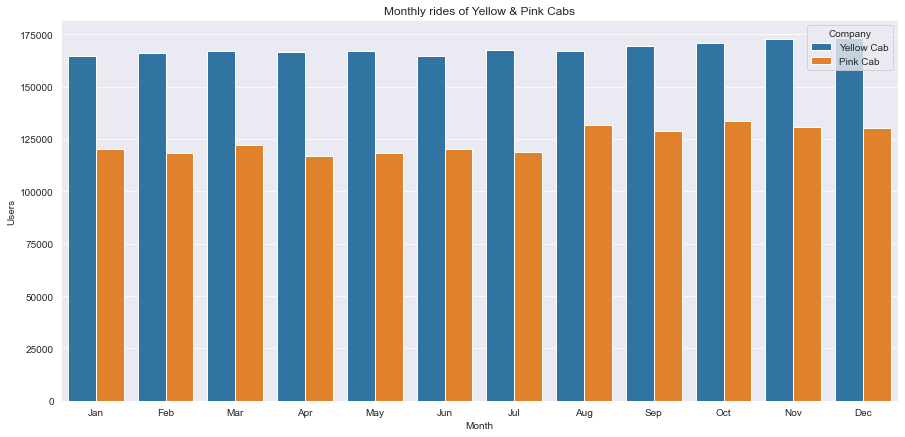

In [27]:
plt.figure(figsize=(15,7))
g = sns.barplot('Month', 'Users', data=df, hue='Company', ci=None);
g.set_xticklabels(labels=month, rotation=0)
g.set_title('Monthly rides of Yellow & Pink Cabs')
plt.show()

#### Yellow cab has more users each month over the years

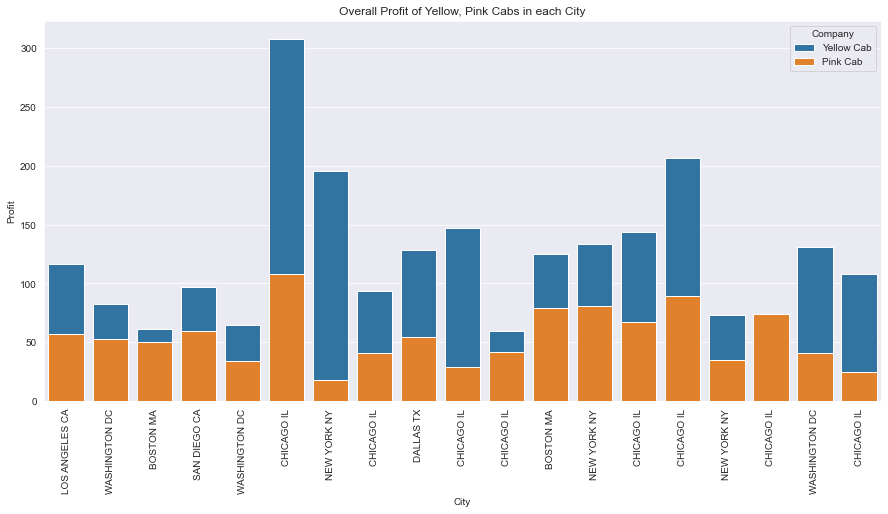

In [28]:
plt.figure(figsize=(15,7))
g = sns.barplot('City', 'Profit', data=df, hue='Company', ci=None, dodge=0);
g.set_xticklabels(labels=df['City'], rotation=90)
g.set_title('Overall Profit of Yellow, Pink Cabs in each City')
plt.show()

#### Except Chicago, Yellow Cab has more profit margin in each city.

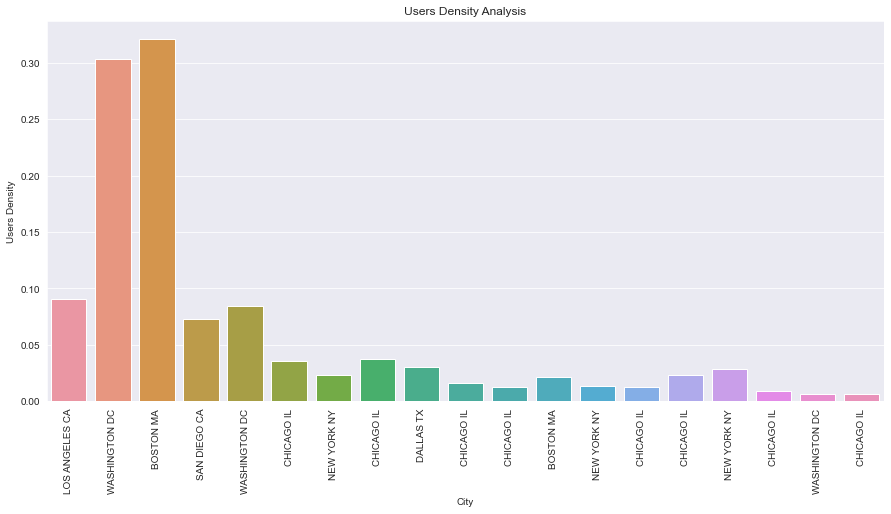

In [29]:
plt.figure(figsize=(15,7))
g = sns.barplot('City', 'Users Density', data=df, ci=None, dodge=1);
g.set_xticklabels(labels=df['City'], rotation=90)
g.set_title('Users Density Analysis')
plt.show()

#### Around 30% of the population in Washington DC and Boston use cab services whereas for all other cities it's less than 10%

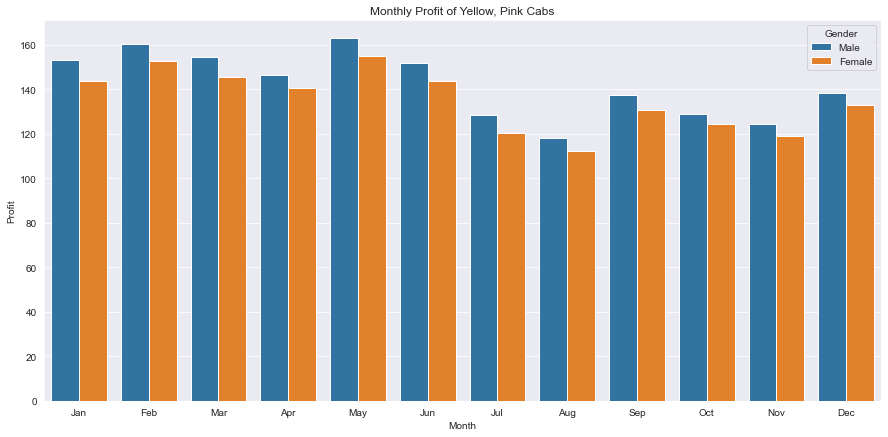

In [30]:
plt.figure(figsize=(15,7))
g = sns.barplot('Month', 'Profit', data=df, hue='Gender', ci=None);
g.set_xticklabels(labels=month, rotation=0)
g.set_title('Monthly Profit of Yellow, Pink Cabs')
plt.show()

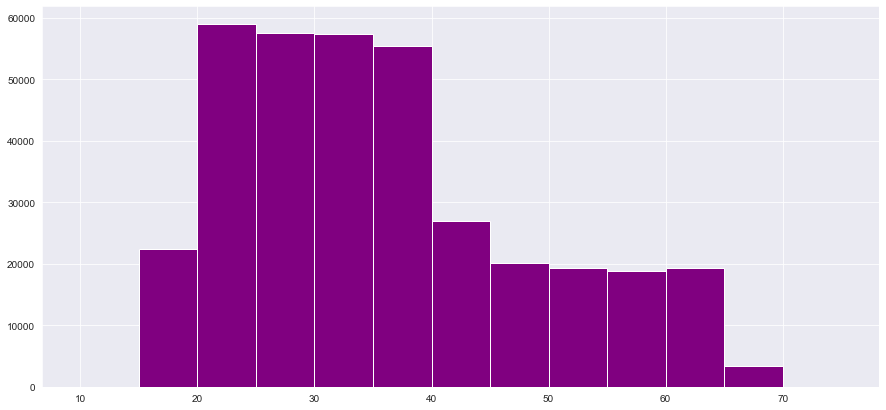

In [31]:
plt.figure(figsize=(15,7))
plt.hist(df.Age, bins=np.arange(10, 80, 5), color='purple');
plt.show()

#### Most of the users are aged between 20 to 40 years

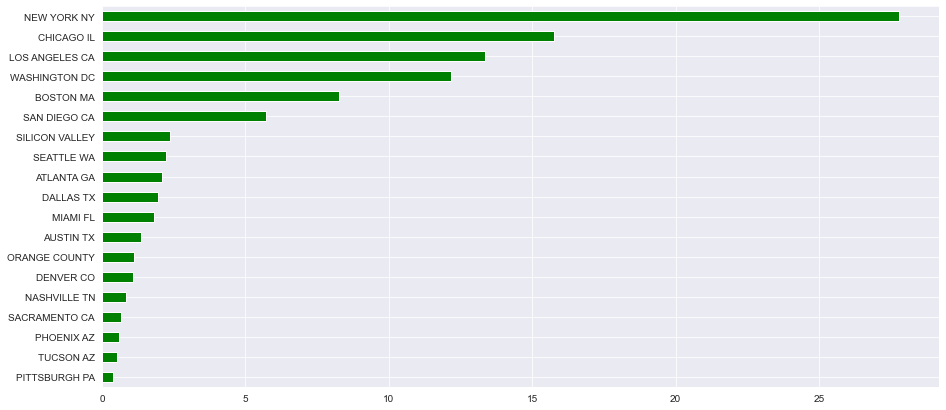

In [32]:
plt.figure(figsize=(15,7))
(df.City.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g');
plt.show()

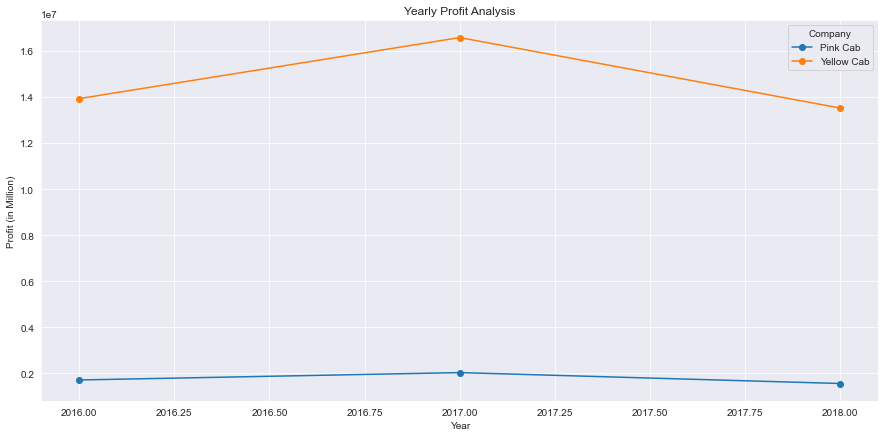

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
df.groupby(['Year', 'Company']).sum()['Profit'].unstack().plot(ax=ax, title='Yearly Profit Analysis', ylabel='Profit (in Million)', marker='o');

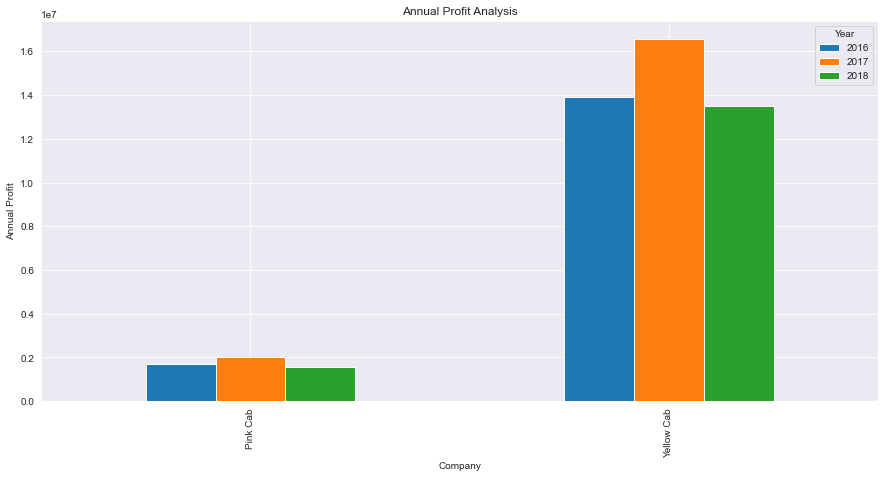

In [34]:
(df.pivot_table(index='Company', columns='Year', values='Profit', aggfunc='sum')).plot(kind='bar', figsize=(15,7), ylabel='Annual Profit', title='Annual Profit Analysis');

In [35]:
df.pivot_table(index='Company', columns='Year', values='Profit', aggfunc='sum', margins=True)

Year,2016,2017,2018,All
Company,,,,
Pink Cab,1.713511e+06,2.033655e+06,1.560162e+06,5.307328e+06
Yellow Cab,1.392700e+07,1.657598e+07,1.351740e+07,4.402037e+07
All,1.564051e+07,1.860963e+07,1.507756e+07,4.932770e+07


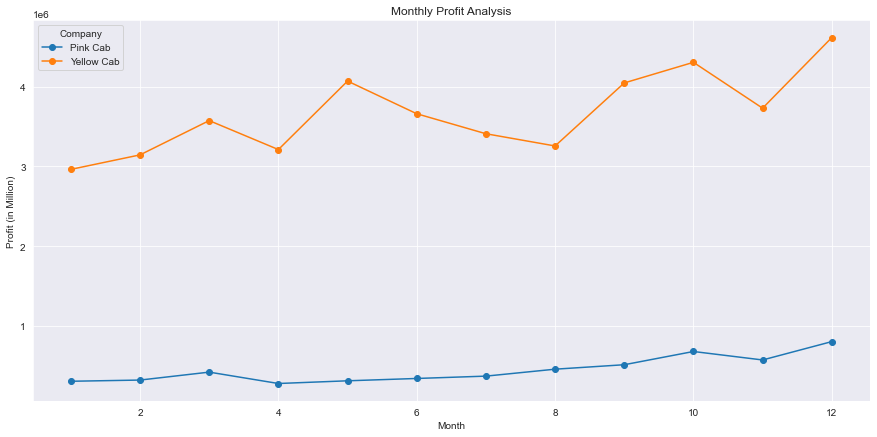

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
df.groupby(['Month', 'Company']).sum()['Profit'].unstack().plot(ax=ax, title='Monthly Profit Analysis', ylabel='Profit (in Million)', marker='o');

#### There is a decrease in Monthly Profit of Yellow Cab during June to August whereas Pink Cab has an increase

In [37]:
df['Price Charged per KM'] = df['Price Charged'] / df['KM Travelled']

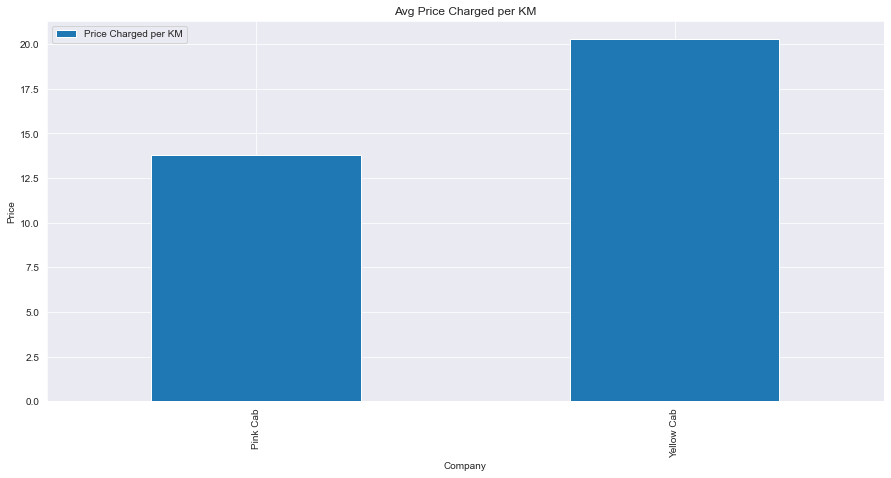

In [38]:
((df[['Price Charged per KM', 'Company']].groupby('Company')).mean()).plot(kind='bar', figsize=(15,7), title='Avg Price Charged per KM', ylabel='Price');
plt.show()

#### Avg Price Charged per KM for Yellow Cab is 20.3 USD & for Pink Cab is 13.76 USD

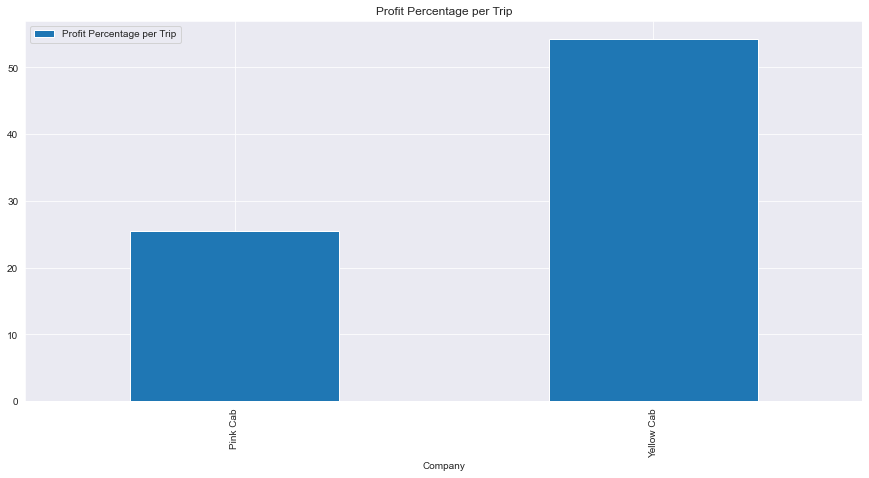

In [39]:
df[['Profit Percentage per Trip', 'Company']].groupby('Company').mean().plot(kind='bar', figsize=(15,7), title='Profit Percentage per Trip');
plt.show()

#### Profit Percentage per Trip for 
#### Pink Cab is 25.559567
#### Yellow Cab is 54.296631

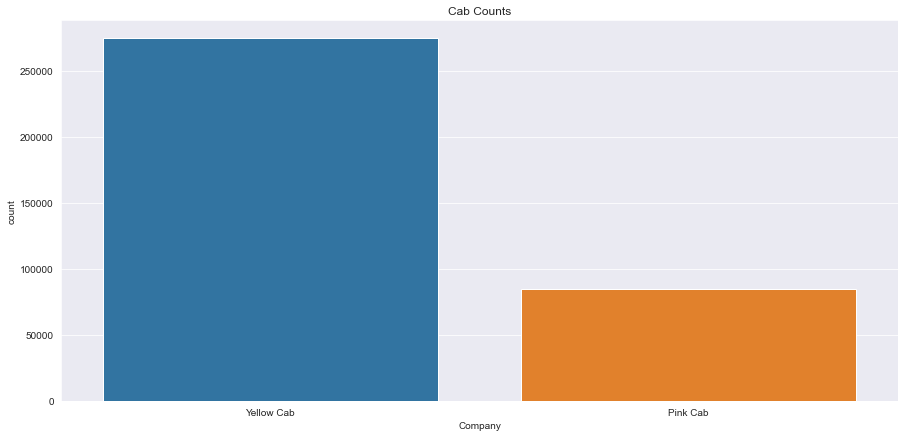

In [40]:
plt.figure(figsize=(15,7))
g=sns.countplot(x='Company', data=df);
g.set_title('Cab Counts')
plt.show()

In [41]:
df['Company'].value_counts(normalize=True)

Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64

In [42]:
city_grp['Income (USD/Month)'].agg(['median', 'mean', 'min', 'max'])

,median,mean,min,max
City,,,,
ATLANTA GA,14655,14933.150986,2029,34972
AUSTIN TX,14374,14696.495711,2027,34921
BOSTON MA,14743,15128.563317,2019,34985
CHICAGO IL,14527,15101.718269,2007,34901
DALLAS TX,14242,14846.508194,2007,34996
DENVER CO,14580,14975.655163,2022,35000
LOS ANGELES CA,14889,15064.550455,2007,34984
MIAMI FL,14759,14984.887202,2013,34862
NASHVILLE TN,14195,14734.359801,2002,34960


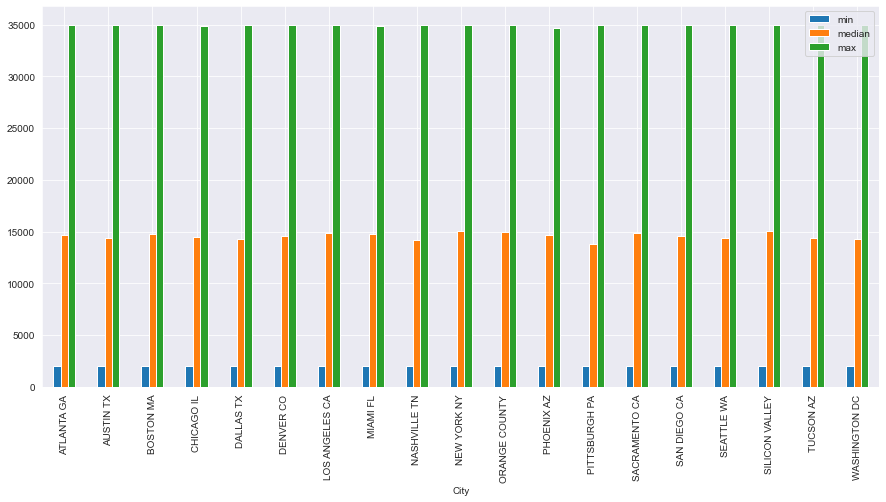

In [43]:
(city_grp['Income (USD/Month)'].agg(['min', 'median', 'max'])).plot(kind='bar', figsize=(15,7));

#### There is equal range of incomes for each city

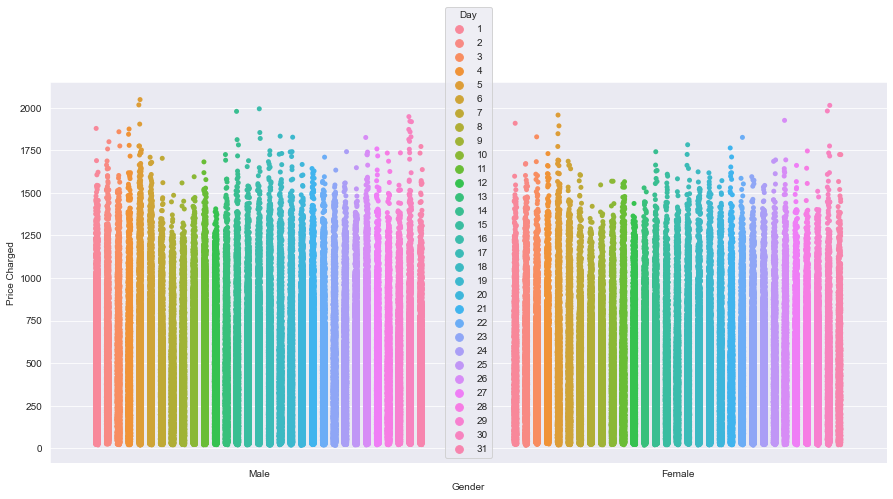

In [88]:
plt.figure(figsize=(15,7))
sns.stripplot(x="Gender", y="Price Charged", hue="Day", data = df, dodge=True)
plt.show()

#### There is no discount for Female customers

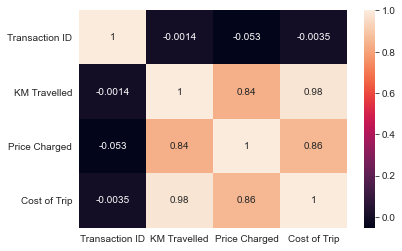

In [44]:
sns.heatmap(cab.corr(), color='b', annot=True);

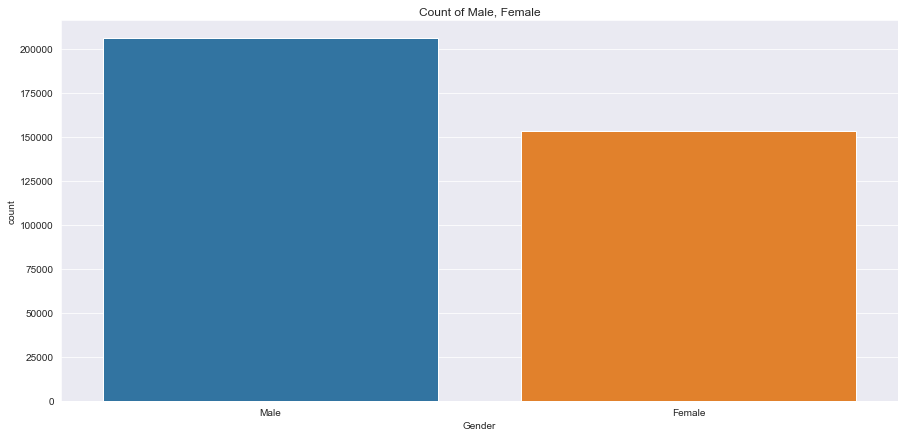

In [45]:
plt.figure(figsize=(15,7))
g=sns.countplot(x = 'Gender', data = df);
g.set_title('Count of Male, Female')
plt.show()

#### More no. of Male users

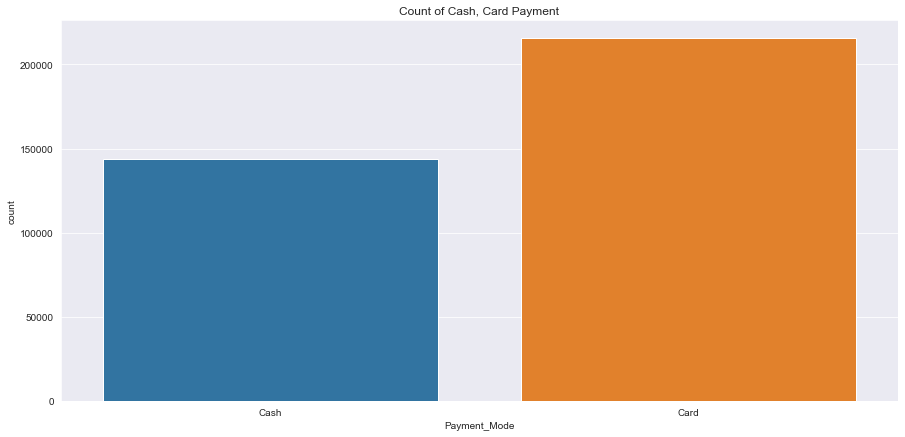

In [46]:
plt.figure(figsize=(15,7))
g=sns.countplot(df['Payment_Mode']);
g.set_title('Count of Cash, Card Payment')
plt.show()

#### No. of Card payment is more than no. of cash payment

In [47]:
df['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

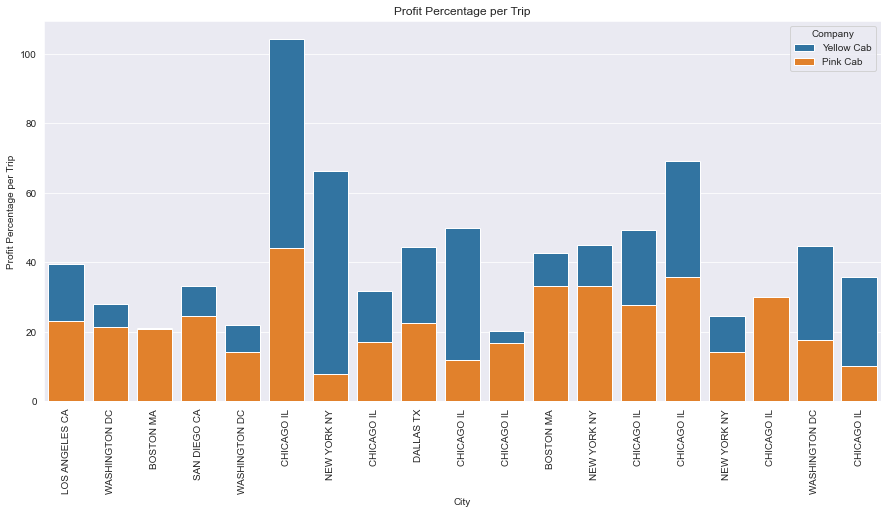

In [48]:
plt.figure(figsize=(15,7))
g = sns.barplot(x='City', y='Profit Percentage per Trip', hue='Company', data=df, dodge=0, ci=None);
g.set_title('Profit Percentage per Trip')
g.set_xticklabels(labels=df['City'], rotation=90);
plt.show()

#### Except Chicago and Boston Yellow Cab makes more profit per trip in every city

In [49]:
yearly_price = df.groupby(['Year'])['Price Charged'].mean().reset_index().rename(columns = {'Price Charged':'Avg Price Charged'})

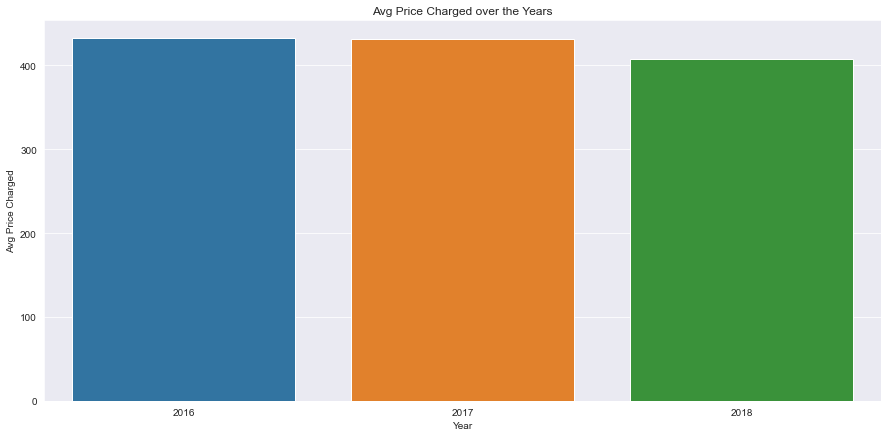

In [50]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Year', y = 'Avg Price Charged', data = yearly_price).set_title("Avg Price Charged over the Years");
plt.show()

#### The avg price charged for the year 2018 is comparitively less.

In [51]:
yearly_cost = df.groupby(['Year'])['Cost of Trip'].mean().reset_index().rename(columns = {'Cost of Trip':'Avg Cost of Trip'})

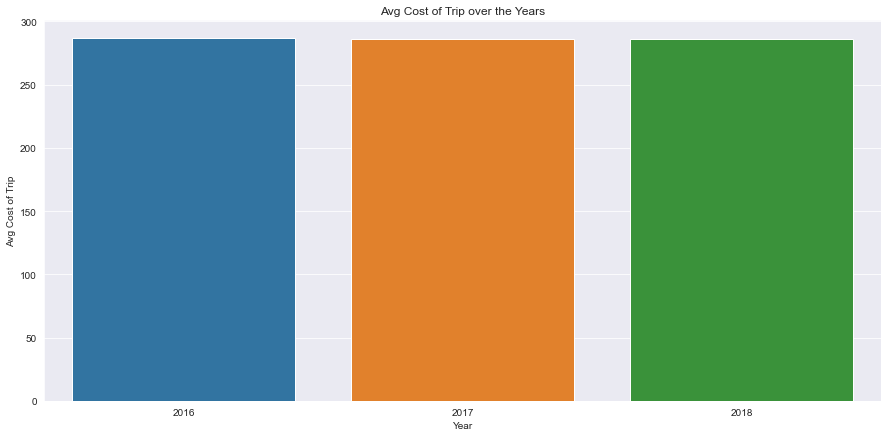

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Year', y = 'Avg Cost of Trip', data = yearly_cost).set_title("Avg Cost of Trip over the Years");
plt.show()

#### The avg cost of trip over the years remains constant

## T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types :
1. One sampled t-test
2. Two-sampled t-test.

In [53]:
import scipy.stats as stat

In [54]:
from scipy.stats import ttest_1samp

In [55]:
from scipy.stats import ttest_ind

In [56]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Users Density,Total Price Charged,Total Cost of Trip,Price Charged per KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,3.132198e+06,158365.582267,19191.652115,35.336705,15048.822937,15.972835,3.463461,7.156047,2017.045199,137.253198,47.523121,6.083579,0.106687,7.742328e+07,5.146870e+07,18.765127
std,1.268058e+05,12.233526,274.378911,157.993661,3.315194e+06,100850.051020,21012.412463,12.594234,7969.409482,8.503010,1.940577,3.413283,0.800239,160.311840,42.571507,5.543493,0.106331,4.405099e+07,2.968841e+07,5.878560
min,1.000001e+07,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,1.000000,18.000000,2000.000000,1.000000,0.000000,1.000000,2016.000000,-220.060000,-40.930000,-4.998235,0.006497,4.028900e+02,3.278052e+02,6.338621
25%,1.011081e+07,12.000000,206.437500,151.200000,6.712380e+05,80021.000000,2705.000000,25.000000,8424.000000,9.000000,2.000000,4.000000,2016.000000,28.012000,16.080000,2.000385,0.035945,3.889724e+07,2.574346e+07,14.451327
50%,1.022104e+07,22.440000,386.360000,282.480000,1.595037e+06,144132.000000,7459.000000,33.000000,14685.000000,16.000000,4.000000,8.000000,2017.000000,81.962000,35.930000,4.466809,0.072964,7.826163e+07,5.148147e+07,17.153501
75%,1.033094e+07,32.960000,583.660000,413.683200,8.405837e+06,302149.000000,36078.000000,42.000000,21035.000000,23.000000,5.000000,10.000000,2018.000000,190.030000,71.270000,9.170006,0.090363,1.159476e+08,7.719910e+07,22.234926
max,1.044011e+07,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,60000.000000,65.000000,35000.000000,31.000000,6.000000,12.000000,2018.000000,1463.966000,320.210000,41.115556,0.321411,1.521821e+08,1.028544e+08,53.955556


### Hypothesis testing 01: 
### H0 = Mean Cost of Trip is 286
### H1 = Mean Cost of Trip is not 286

In [57]:
sample_size = int((10/100)*359392) # Considering 10% values as sample data
cost_sample = np.random.choice(df['Cost of Trip'], sample_size)

In [58]:
sample_size

35939

In [59]:
ttest, p_value = ttest_1samp(cost_sample, 286)

In [60]:
p_value

0.24388343882473312

In [61]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nMean Cost of Trip is not 286")
else:
    print("We are accepting null hypothesis (H0): \nMean Cost of Trip is 286")

We are accepting null hypothesis (H0): 
Mean Cost of Trip is 286


### Hypothesis testing 02: 
### H0 = Mean Price Charged is 423
### H1 = Mean Price Charged is not 423

In [62]:
price_sample = np.random.choice(df['Price Charged'], sample_size)

In [63]:
ttest, p_value = ttest_1samp(price_sample, 423)
p_value

0.6642822363914511

In [64]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nMean Price Charged is not 423")
else:
    print("We are accepting null hypothesis (H0): \nMean Price Charged is 423")

We are accepting null hypothesis (H0): 
Mean Price Charged is 423


### Hypothesis testing 03: 
### H0 = Mean Age is 35
### H1 = Mean Age is not 35

In [65]:
age_sample = np.random.choice(df.Age, sample_size)

In [66]:
ttest, p_value = ttest_1samp(age_sample, 35)
p_value

1.4745134464545258e-09

In [67]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nMean Age is not 35")
else:
    print("We are accepting null hypothesis (H0): \nMean Age is 35")

We are rejecting null hypothesis (H0): 
Mean Age is not 35


### Hypothesis testing 04:
### H0 = Mean KM Travelled is 22.5 KM
### H1 = Mean KM Travelled is not 22.5 KM

In [68]:
km_sample = np.random.choice(df['KM Travelled'], sample_size)

In [69]:
ttest, p_value = ttest_1samp(km_sample, 22.5)

In [70]:
p_value

0.0005568852037631852

In [71]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nMean KM Travelled is not 22.5 KM")
else:
    print("We are accepting null hypothesis (H0): \nMean KM Travelled is 22.5 KM")

We are rejecting null hypothesis (H0): 
Mean KM Travelled is not 22.5 KM


### Hypothesis testing 05:
### H0 = Mean Profit Percentage per Trip is 47.5%
### H1 = Mean Profit Percentage per Trip is not 47.5%

In [72]:
pppt_sample = np.random.choice(df['Profit Percentage per Trip'], sample_size)

In [73]:
ttest, p_value = ttest_1samp(pppt_sample, 47.5)

In [74]:
p_value

0.5651072336754599

In [75]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nMean Profit Percentage per Trip is not 47.5%")
else:
    print("We are accepting null hypothesis (H0): \nMean Profit Percentage per Trip is 47.5%")

We are accepting null hypothesis (H0): 
Mean Profit Percentage per Trip is 47.5%


### Hypothesis testing (Two-sample T-test) 06:
### H0 = Mean Price charged by Pink, Yellow Cabs are equal
### H1 = Mean Price charged by Pink, Yellow Cabs are not equal

In [76]:
df['Price Charged per KM'].groupby(df['Company']).mean()

Company
Pink Cab      13.768510
Yellow Cab    20.306073
Name: Price Charged per KM, dtype: float64

In [77]:
price_per_km_sample_yellow = np.random.choice(df[df['Company'] == 'Yellow Cab']['Price Charged per KM'], sample_size)
price_per_km_sample_pink = np.random.choice(df[df['Company'] == 'Pink Cab']['Price Charged per KM'], sample_size)

In [78]:
ttest, p_value = ttest_ind(price_per_km_sample_yellow, price_per_km_sample_pink, equal_var = False)
p_value

0.0

In [79]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nMean Price charged by Pink, Yellow Cabs are not equal")
else:
    print("We are accepting null hypothesis (H0): \nMean Price charged by Pink, Yellow Cabs are equal")

We are rejecting null hypothesis (H0): 
Mean Price charged by Pink, Yellow Cabs are not equal


### Hypothesis testing (Two-sample T-test) 07:
### H0 = Profit Percentage per Trip is equal for both cab service providers
### H1 = Profit Percentage per Trip is not equal for both cab service providers

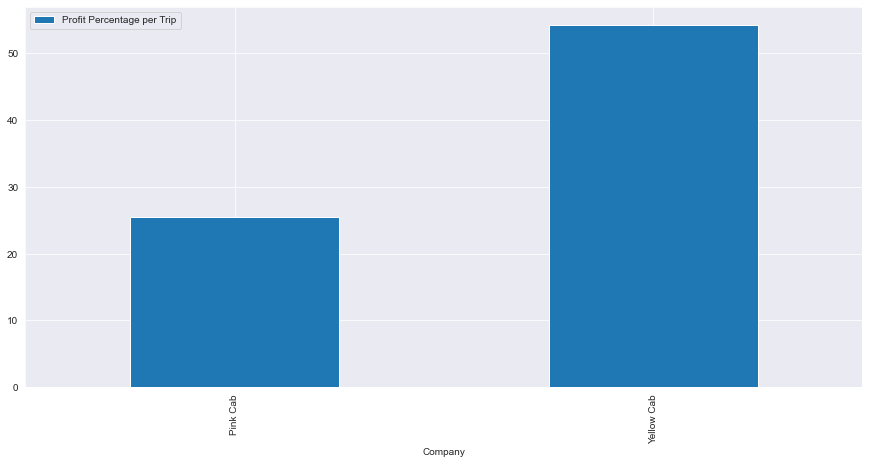

In [80]:
df[['Profit Percentage per Trip', 'Company']].groupby('Company').mean().plot(kind='bar', figsize=(15,7));
plt.show()

In [81]:
df['Profit Percentage per Trip'].groupby(df['Company']).mean()

Company
Pink Cab      25.559567
Yellow Cab    54.296631
Name: Profit Percentage per Trip, dtype: float64

In [82]:
pppt_sample_yellow = np.random.choice(df[df['Company'] == 'Yellow Cab']['Profit Percentage per Trip'], sample_size)
pppt_sample_pink = np.random.choice(df[df['Company'] == 'Pink Cab']['Profit Percentage per Trip'], sample_size)

In [83]:
ttest, p_value = ttest_ind(price_per_km_sample_yellow, price_per_km_sample_pink, equal_var = False)
p_value

0.0

In [84]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis (H0): \nProfit Percentage per Trip is not equal for both cab service providers")
else:
    print("We are accepting null hypothesis (H0): \nProfit Percentage per Trip is equal for both cab service providers")

We are rejecting null hypothesis (H0): 
Profit Percentage per Trip is not equal for both cab service providers


# Conclusion

* No duplicate data was found
* People prefer Yellow Cabs over Pink Cabs in every city except these 4:
1. Nashville
2. Pittsburgh
3. Sacramento
4. San Diego
* New York City has the highest Profit per KM while Sacramenyo has the lowest Profit per KM
* Avg distance travelled is 22.5 KM
* Over the weekends: distance travelled increases slightly => Profit increases
* Top 5 cities with highest avg profit (in descending order):
1. New York
2. Dallas
3. Silicon Valley
4. Miami
5. Orange County
* Except Chicago, Yellow Cab has more profit margin in each city.
* Around 30% of the population in Washington DC and Boston use cab services whereas for all other cities it's less than 10%
* Most of the users are aged between 20 to 40 years
* There is no discount for Female customers
* Avg Price Charged per KM for Yellow Cab is 20.3 USD & for Pink Cab is 13.76 USD
* Profit Percentage per Trip for
* Pink Cab is 25.559567
* Yellow Cab is 54.296631
* Mean Profit Percentage per Trip is 47.5%